In [59]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [60]:
data = {'job_type': ['student', 'professional', 'professional', 'student', 'retired', 'professional', 'retired'],
        'owns_car': [True, False, False, False, True, False, True],
        'age': [25, 32, 21, 22, 35, 28, 50],
        'buy_house': ['no', 'no', 'yes', 'no', 'yes', 'yes', 'yes']}

In [61]:
house_df = pd.DataFrame(data)

In [62]:
house_df.head()

,job_type,owns_car,age,buy_house
0,student,True,25,no
1,professional,False,32,no
2,professional,False,21,yes
3,student,False,22,no
4,retired,True,35,yes


In [63]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job_type   7 non-null      object
 1   owns_car   7 non-null      bool  
 2   age        7 non-null      int64 
 3   buy_house  7 non-null      object
dtypes: bool(1), int64(1), object(2)
memory usage: 303.0+ bytes


In [64]:
X = house_df[['job_type', 'owns_car', 'age']]
y = house_df['buy_house']

In [65]:
preprocessing_tr = ColumnTransformer(transformers = [
    ('no_preprocess', 'passthrough', ['owns_car', 'age']),
    ('preprocess', OneHotEncoder(), ['job_type'])
])

In [66]:
pipe = Pipeline([
    ('preprocessing_tr', preprocessing_tr),
    ('my_tree', DecisionTreeClassifier())
])

In [67]:
pipe.fit(X,y)

Pipeline(steps=[('preprocessing_tr',
                 ColumnTransformer(transformers=[('no_preprocess',
                                                  'passthrough',
                                                  ['owns_car', 'age']),
                                                 ('preprocess', OneHotEncoder(),
                                                  ['job_type'])])),
                ('my_tree', DecisionTreeClassifier())])

In [68]:
x_test = pd.DataFrame({'age': [30], 'owns_car': [True], 'job_type': ['professional']})

In [69]:
pipe.predict(x_test)

array(['yes'], dtype=object)

[Text(0.6, 0.875, 'preprocess__job_type_student <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]\nclass = yes'),
 Text(0.4, 0.625, 'no_preprocess__age <= 30.0\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = yes'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = yes'),
 Text(0.6, 0.375, 'preprocess__job_type_professional <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = yes'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = yes'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = no'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = no')]

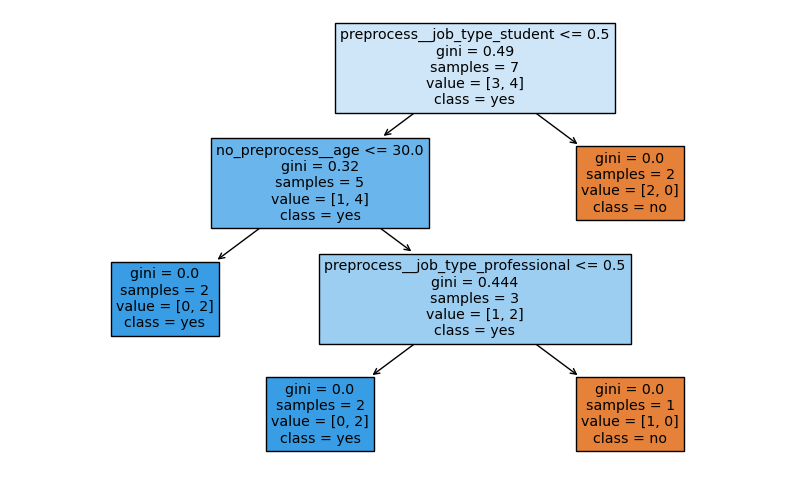

In [70]:
plt.figure(figsize = (10, 6))
plot_tree(pipe['my_tree'], feature_names=preprocessing_tr.get_feature_names_out(), class_names=pipe.classes_, filled=True)